<a href="https://colab.research.google.com/github/shehryars715/Payment_Anomaly_Detector/blob/main/cc_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Dataset: Comprehensive Theoretical Overview


### Classification Type: Binary Classification
This dataset addresses one of the most critical challenges in financial technology: distinguishing between legitimate and fraudulent credit card transactions. The problem is formulated as a binary classification task where each transaction must be categorized as:

- **Class 0**: Legitimate transaction
- **Class 1**: Fraudulent transaction

The primary objective is to develop robust machine learning models capable of identifying fraudulent transactions while minimizing false positives that could inconvenience legitimate customers.

## Dataset Characteristics


### Data Source and Provenance
The dataset originates from a collaboration between Worldline and the Machine Learning Group of Université Libre de Bruxelles. It represents real-world credit card transactions that have been carefully anonymized to protect customer privacy while preserving the underlying patterns essential for fraud detection research.

## Feature Architecture

### Feature Categories

#### Temporal Features
- **Time**: Elapsed seconds since the first transaction in the dataset
  - Enables analysis of temporal patterns in fraudulent behavior
  - Useful for detecting time-based anomalies

#### Monetary Features
- **Amount**: Transaction value in the original currency
  - Critical for understanding fraud patterns across different transaction sizes
  - Requires careful scaling due to wide value distribution

#### Anonymized Principal Components
- **V1 through V28**: 28 features derived through Principal Component Analysis (PCA)
  - Original features transformed to protect sensitive information
  - Retain mathematical relationships while ensuring privacy compliance
  - Each component captures different aspects of transaction behavior

### Privacy-Preserving Transformation

The application of PCA serves dual purposes:

1. **Privacy Protection**: Original feature names and raw values are obscured to prevent identification of specific transaction details or customer information

2. **Dimensionality Optimization**: PCA reduces the complexity of the feature space while preserving the variance necessary for effective pattern recognition

## The Class Imbalance Challenge

### Severity of Imbalance
With only 0.172% of transactions being fraudulent, this dataset exemplifies an extreme class imbalance problem. This imbalance presents several critical challenges:

### Modeling Difficulties
- **Bias Toward Majority Class**: Models tend to achieve high accuracy by simply predicting all transactions as legitimate
- **Poor Minority Class Learning**: Insufficient fraudulent examples for robust pattern learning
- **Evaluation Complexity**: Traditional accuracy metrics become misleading

### Real-World Implications
The cost asymmetry in fraud detection is significant:
- **False Negatives (Missing Fraud)**: Direct financial losses, regulatory penalties, reputation damage
- **False Positives (Blocking Legitimate Transactions)**: Customer dissatisfaction, operational costs, revenue loss





**Loading Data**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


## 🔍 Gather Sense of Our Data

Before diving deeper, it's important to get a basic understanding of our dataset:

- We know the **`Transaction`** and **`Amount`** columns and their meanings.
- The other columns (V1 to V28) represent anonymized features — their exact meanings are **unknown due to privacy**.
- These unknown features have already been **scaled/normalized** to protect sensitive information.

This context helps us interpret our analysis and choose appropriate modeling strategies.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## ✅ Missing Values Check

After checking for missing values in the dataset, we found **no null values** in any column.

This means the dataset is **complete and clean**, so we can proceed with analysis and modeling without worrying about imputing missing data.


In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 📊 Class Distribution: Legit vs Fraud

We visualize the distribution of the target variable (`Class`):

- **Class 0** = Non-Fraudulent (Legit)
- **Class 1** = Fraudulent

### 🔍 Why this matters:
- Reveals **class imbalance**, which is common in fraud datasets.
- Most transactions are **legit**, with only a **tiny fraction being fraud**.
- Important for choosing the right evaluation metrics (e.g., precision, recall, F1) and considering techniques like:
  - Oversampling (e.g., SMOTE)
  - Undersampling
  - Class-weighted models

> Fraud detection is a **highly imbalanced classification problem** — this plot makes that imbalance clear.


In [6]:
print("\nClass distribution:\n", df['Class'].value_counts())
print("\nPercentage of frauds: {:.4f}%".format(df['Class'].mean()*100))


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of frauds: 0.1727%


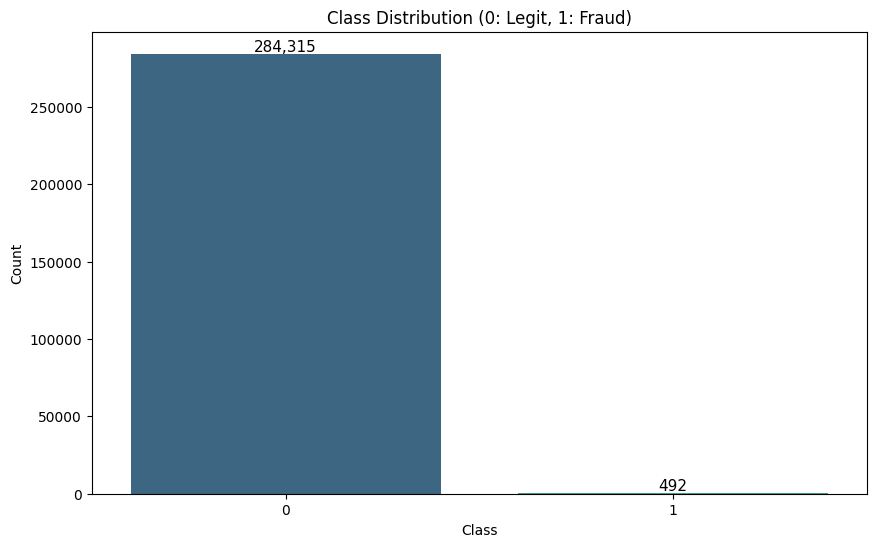

In [7]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df, palette='viridis',  hue = 'Class', legend=False)

plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')

# Add exact numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## 💳 Fraud vs Non-Fraud Transaction Amount Analysis

We compared the transaction amounts for **fraudulent (Class = 1)** and **non-fraudulent (Class = 0)** transactions using descriptive statistics.

### 📊 Descriptive Statistics (Side by Side)

| Statistic | Fraudulent | Non-Fraudulent |
|-----------|------------|----------------|
| Count     | 492        | 284,315        |
| Mean      | 122.21     | 88.29          |
| Std Dev   | 256.68     | 250.10         |
| Min       | 0.00       | 0.00           |
| 25%       | 1.00       | 5.65           |
| 50% (Median) | 9.25    | 22.00          |
| 75%       | 105.89     | 77.05          |
| Max       | 2125.87    | 25,691.16      |

---

### 🧠 Interpretation

- The **mean** amount of fraudulent transactions is **higher**, due to a few very large frauds.
- However, the **median** is **lower**, showing that **most frauds are small** in value.
- **Fraudulent transactions are heavily skewed** — most are small, but a few are very large.

---

### ✅ What to Focus on in Fraud Detection

| Goal                                   | Recommended Focus      |
|----------------------------------------|-------------------------|
| Detecting typical fraud behavior       | **Median** / full distribution |
| Understanding financial risk / impact | **Mean**, **Max**, or high percentiles (e.g., 95th) |

**Key Takeaway:**  
> Your model should **not ignore small-value transactions** — they make up the bulk of frauds.  
But, also consider **large transactions** when estimating **risk or prioritizing alerts**.

---



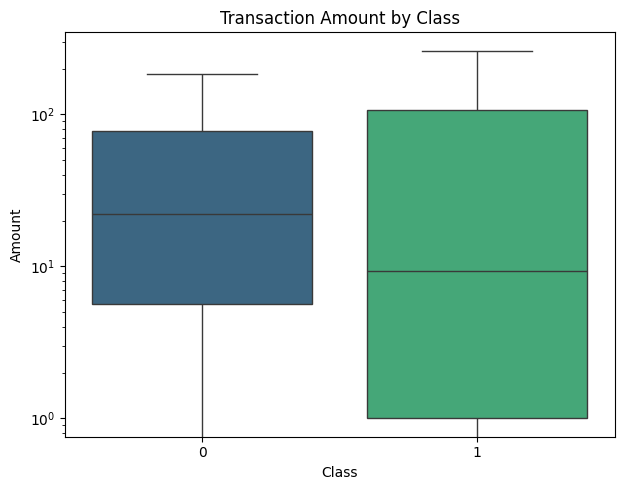

Transaction Amount Statistics (Side by Side):
        Fraudulent  Non-Fraudulent
count   492.000000   284315.000000
mean    122.211321       88.291022
std     256.683288      250.105092
min       0.000000        0.000000
25%       1.000000        5.650000
50%       9.250000       22.000000
75%     105.890000       77.050000
max    2125.870000    25691.160000


In [8]:
# Distribution of transaction amounts by class
plt.figure(figsize=(12, 5))


# Plot separated by class
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='viridis', hue='Class', legend=False)
plt.yscale('log')
plt.title('Transaction Amount by Class')
plt.tight_layout()
plt.show()

# Get amount data
fraud_amount = df[df['Class'] == 1]['Amount']
nonfraud_amount = df[df['Class'] == 0]['Amount']

# Get statistics
fraud_stats = fraud_amount.describe()
nonfraud_stats = nonfraud_amount.describe()

# Combine into a single DataFrame
comparison = pd.DataFrame({
    'Fraudulent': fraud_stats,
    'Non-Fraudulent': nonfraud_stats
})

print("Transaction Amount Statistics (Side by Side):")
print(comparison)


## 📈 Mean Difference of V-Features (Fraud vs Non-Fraud)

We calculate the mean of each V-feature (V1–V28) for fraudulent and non-fraudulent transactions, then plot the **difference**:


### 🔍 Why this matters:
- Highlights which features differ most between fraud and non-fraud.
- Large positive or negative bars indicate **strong discriminative features**.
- Useful for **feature selection** or understanding model decision boundaries.

> Helps identify which V-features might be most relevant for detecting fraud.


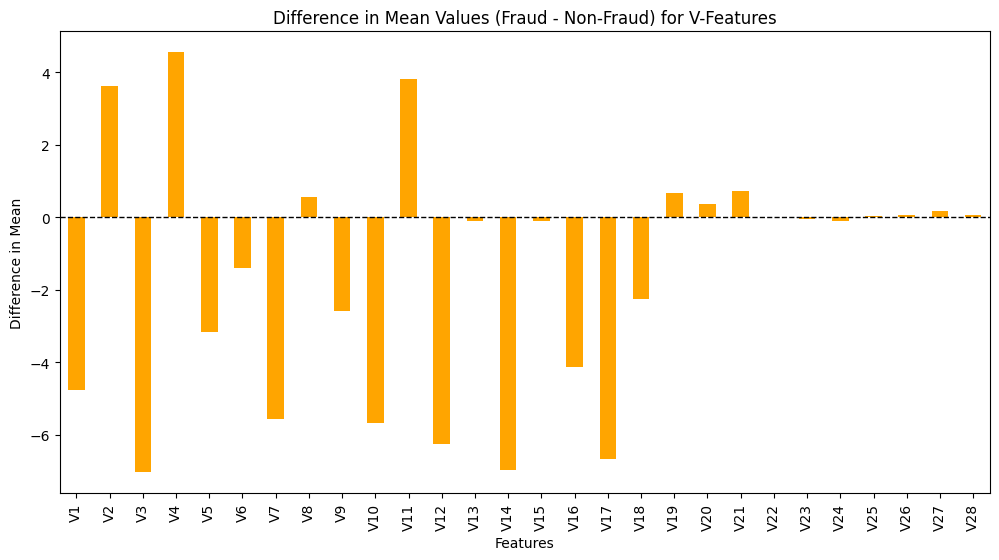

In [9]:
# Let's look at the mean values of the V-features for fraudulent vs non-fraudulent transactions
mean_fraud = df[df['Class']==1].iloc[:, 1:29].mean()
mean_non_fraud = df[df['Class']==0].iloc[:, 1:29].mean()

# Plot the difference in means
plt.figure(figsize=(12, 6))
(mean_fraud - mean_non_fraud).plot(kind='bar', color='orange')
plt.title('Difference in Mean Values (Fraud - Non-Fraud) for V-Features')
plt.xlabel('Features')
plt.ylabel('Difference in Mean')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

### Feature Distribution by Class

Some features show good selectivity between legitimate (Class = 0) and fraudulent (Class = 1) transactions:

- **Clearly separated**: `V4`, `V11`
- **Partially separated**: `V12`, `V14`, `V18`
- **Distinct profile**: `V1`, `V2`, `V3`, `V10`
- **Similar profiles**: `V25`, `V26`, `V28`

In general:
- Most features for **Class = 0** are centered around 0, sometimes with long tails.
- Features for **Class = 1** show **skewed (asymmetric)** distributions.

> Note: `Time` and `Amount` behave differently from the rest.


<Figure size 640x480 with 0 Axes>

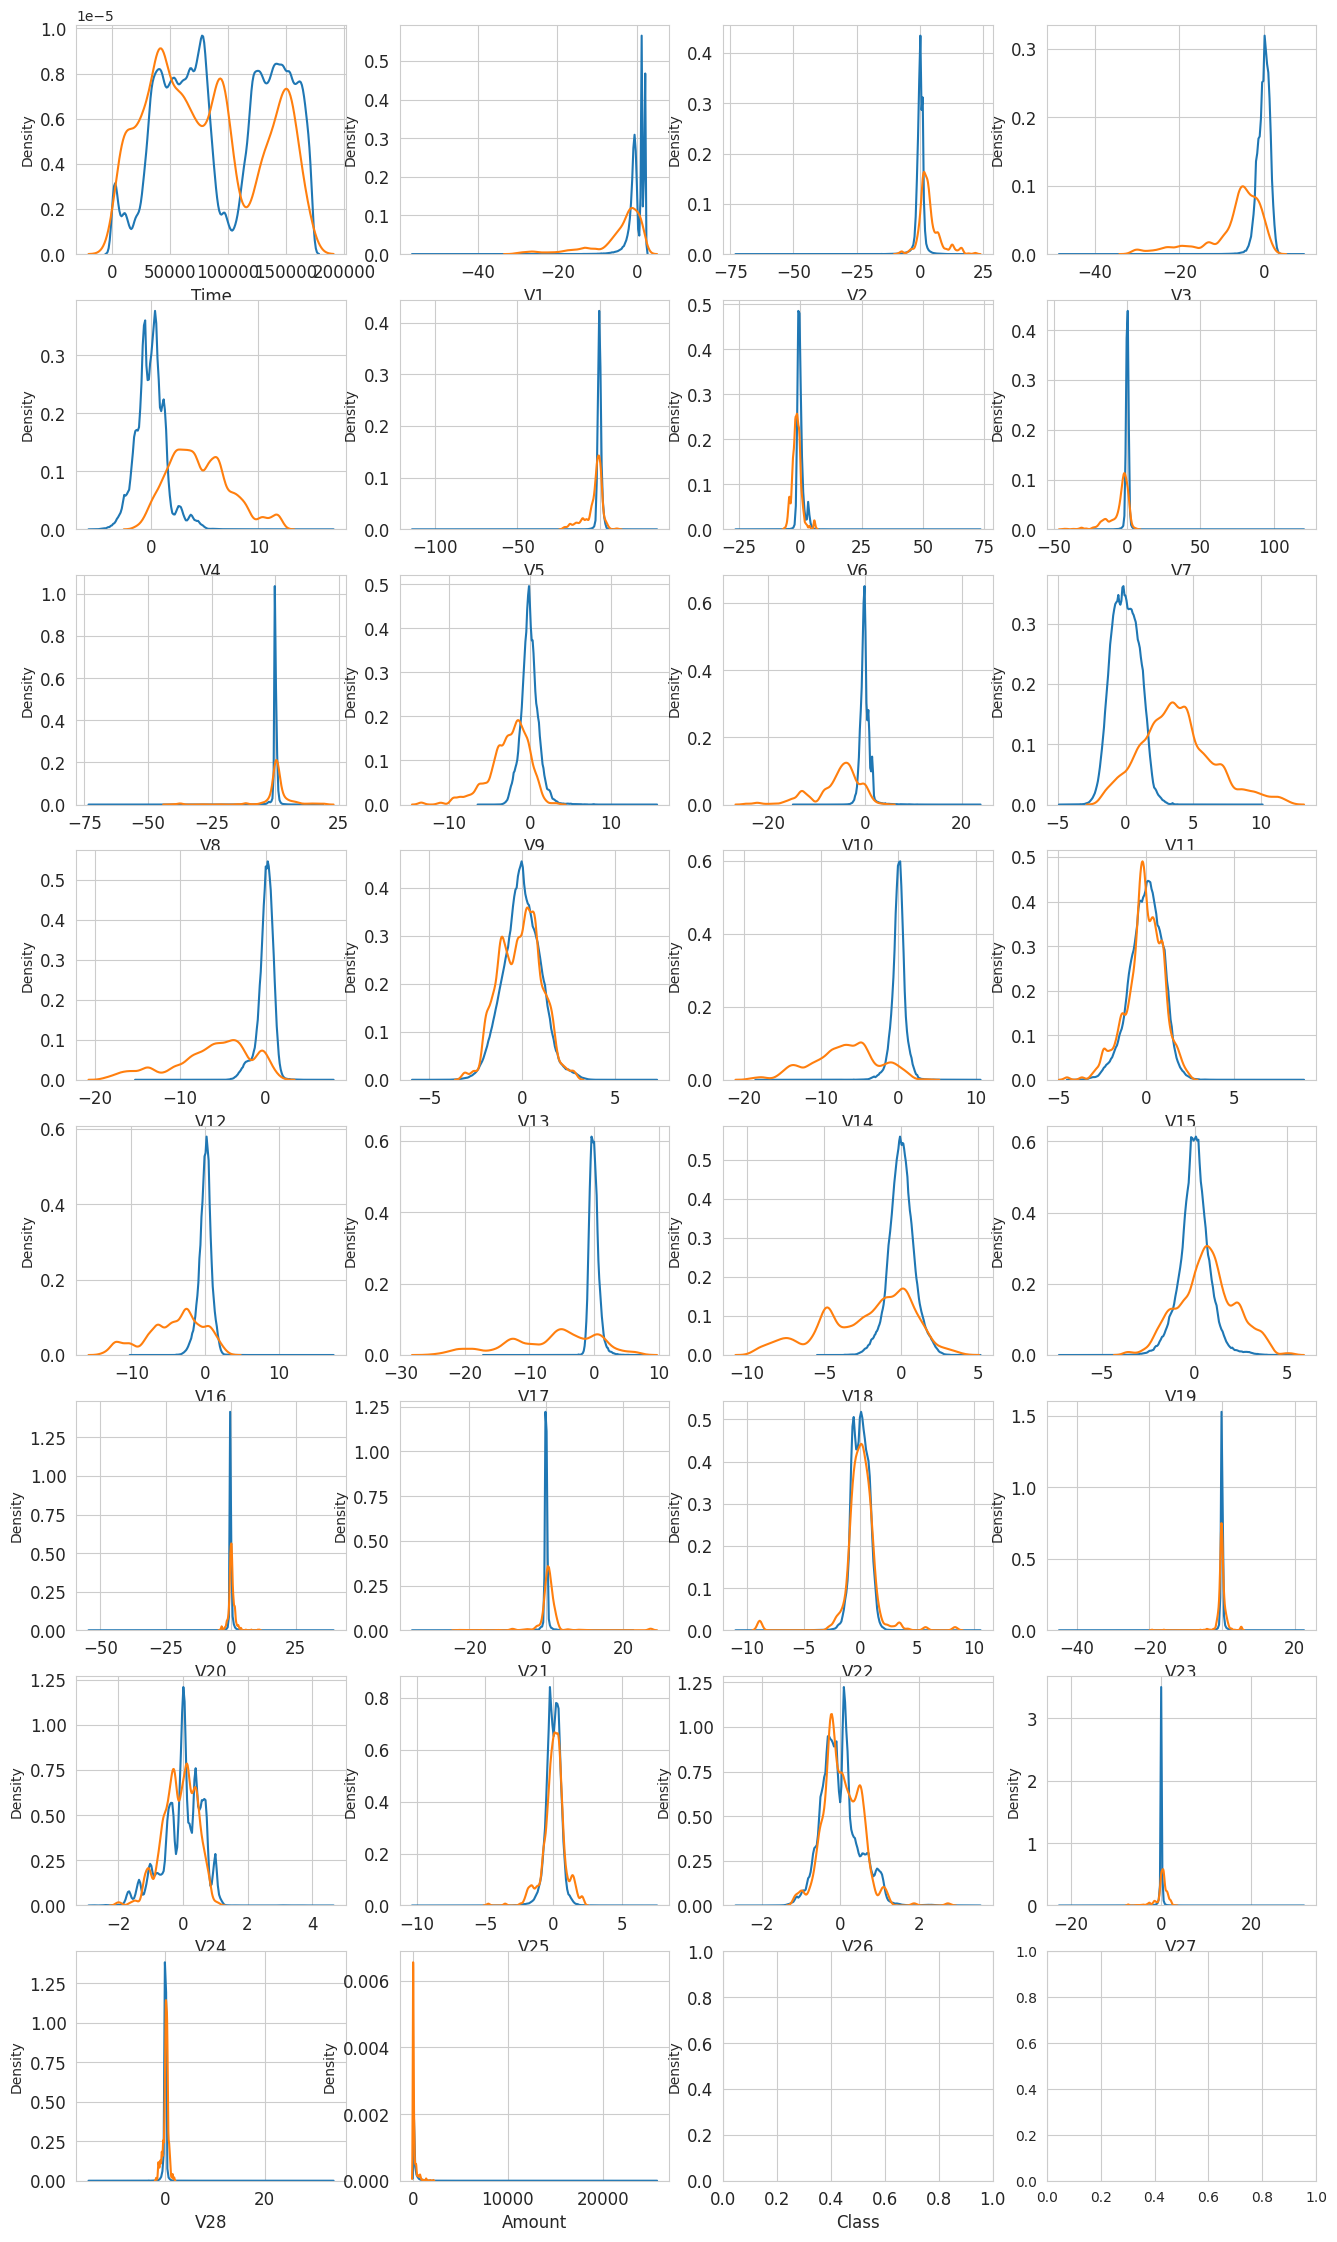

In [10]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_adjust=0.5,label="Class = 0", warn_singular=False)
    sns.kdeplot(t1[feature], bw_adjust=0.5,label="Class = 1", warn_singular=False)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import lightgbm as lgb

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [69]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

# Let's check the original values of 'Amount' in the training set
print("Original 'Amount' stats in training set:")
print(X_train['Amount'].describe())
print("\nOriginal 'Time' stats in training set:")
print(X_train['Time'].describe())

Original 'Amount' stats in training set:
count    227845.000000
mean         88.467774
std         255.327660
min           0.000000
25%           5.580000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64

Original 'Time' stats in training set:
count    227845.000000
mean      94802.524124
std       47483.139161
min           0.000000
25%       54244.000000
50%       84656.000000
75%      139284.000000
max      172792.000000
Name: Time, dtype: float64


In [70]:
# Initialize the RobustScaler
scaler = RobustScaler()

# We only want to fit the scaler on the 'Time' and 'Amount' columns from the TRAINING set.
# We use .fit() so the scaler learns the median and IQR of the training data.
scaler.fit(X_train[['Time', 'Amount']])

# Now we can transform both the training and test sets using the parameters learned from the training set.
X_train[['Time', 'Amount']] = scaler.transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [71]:
print("\n--- After Scaling with RobustScaler ---")
print("\nScaled 'Amount' stats in training set:")
print(pd.DataFrame(X_train['Amount']).describe())
print("\nScaled 'Time' stats in training set:")
print(pd.DataFrame(X_train['Time']).describe())

X_train.head()



--- After Scaling with RobustScaler ---

Scaled 'Amount' stats in training set:
              Amount
count  227845.000000
mean        0.930661
std         3.575016
min        -0.308037
25%        -0.229908
50%         0.000000
75%         0.770092
max       359.411369

Scaled 'Time' stats in training set:
                Time
count  227845.000000
mean        0.119315
std         0.558362
min        -0.995484
25%        -0.357620
50%         0.000000
75%         0.642380
max         1.036406


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159275,0.326105,2.026190,-0.041764,-1.395439,0.067624,0.314498,-0.530806,0.089613,-0.159198,0.396139,...,-0.185214,0.332471,1.105277,0.007347,0.744880,0.320343,-0.471884,0.006951,-0.055800,-0.294035
244838,0.797895,-0.195504,1.545041,1.031471,2.482815,1.695925,0.434180,1.519682,-0.262392,-1.870362,...,-0.031403,-0.229081,-0.542161,-0.025016,0.424075,-0.512201,-0.477338,-0.024537,-0.027638,-0.153878
156230,0.269638,-0.105025,1.309503,-0.365174,-0.391590,1.033099,-0.811986,0.874705,-0.203432,1.362339,...,0.139322,-0.517254,-1.010887,0.116913,0.507027,-0.370831,0.078228,0.300587,0.148577,-0.270372
48726,-0.480915,-0.854246,0.701998,1.166225,-1.185470,-0.782259,-0.933049,0.103878,0.565584,-0.198935,...,-0.070964,0.013683,-0.208008,0.134779,0.544740,-0.307539,0.696862,0.029857,-0.010955,0.229908
144088,0.014076,1.060077,0.093933,0.099762,0.985735,-0.059163,-0.401092,0.279366,-0.135144,-0.392356,...,0.106497,0.118886,0.201846,-0.238252,0.037650,0.699182,-0.337154,-0.001166,0.023533,0.952114


In [72]:
# Create LightGBM Dataset objects for efficient training
train_data = lgb.Dataset(X_train, label=y_train)
# We don't create a Dataset for test here because we will use sklearn's predict later.
# But we can create one for evaluation during training:
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define the core parameters
params = {
    'objective': 'binary',           # For binary classification
    'metric': 'auc',                 # We can monitor AUC during training
    'boosting_type': 'gbdt',         # Traditional Gradient Boosting Decision Tree
    'num_leaves': 31,                # Controls model complexity. Larger values = more complex, risk of overfit.
    'max_depth': 7,                 # -1 means no limit. Often good to set a limit like 7 or 10.
    'learning_rate': 0.05,           # Step size shrinkage. Lower = more robust, need more trees.
    'feature_fraction': 0.9,         # Fraction of features to use per iteration. Prevents overfitting.
    'bagging_fraction': 0.8,         # Fraction of data to use per iteration. Prevents overfitting.
    'bagging_freq': 1,               # Frequency for bagging (every k iteration).
    'verbose': -1,                   # Silences LightGBM output. Set to 1 for details.
    'scale_pos_weight': 0.01, # THE KEY PARAMETER FOR IMBALANCE(tried and tested)
    'random_state': 41,              # For reproducibility
    'n_jobs': -1                     # Use all available CPU cores
}

In [73]:
# Train the model
evals_result = {}  # Dictionary to store evaluation results


# Train the model
model = lgb.train(params,
                  train_data,
                  valid_sets=[train_data, test_data],
                  callbacks=[lgb.record_evaluation(evals_result)],
                  num_boost_round=100)


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.99      0.68      0.81        98

    accuracy                           1.00     56962
   macro avg       0.99      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 1000x500 with 0 Axes>

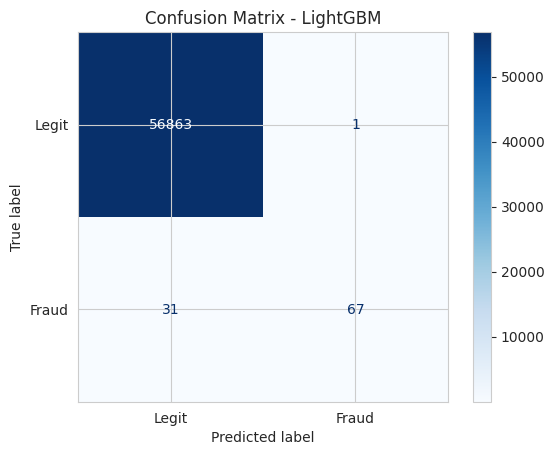


ROC-AUC Score: 0.9849


In [74]:
# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)
# Convert probabilities to binary predictions (using a default threshold of 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# 1. Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legit', 'Fraud']))

# 2. Plot Confusion Matrix
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# 3. Calculate and print AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {auc_score:.4f}")

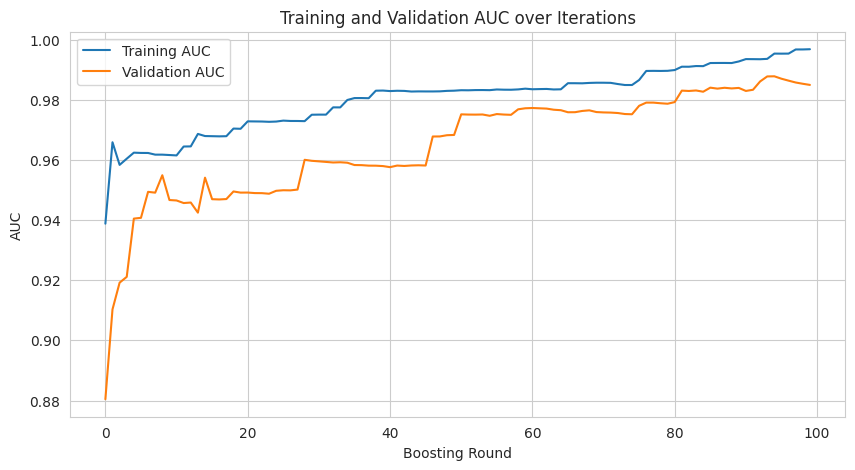

In [76]:
# Plot the AUC metric recorded during training
train_auc = evals_result['training']['auc']
valid_auc = evals_result['valid_1']['auc']

plt.figure(figsize=(10, 5))
plt.plot(train_auc, label='Training AUC')
plt.plot(valid_auc, label='Validation AUC')
plt.title('Training and Validation AUC over Iterations')
plt.xlabel('Boosting Round')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()